
------------------------------------------------------------------------------------

Iteration#1


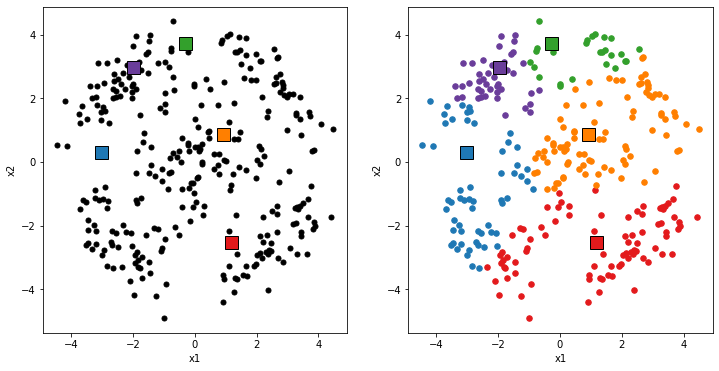

Iteration#2


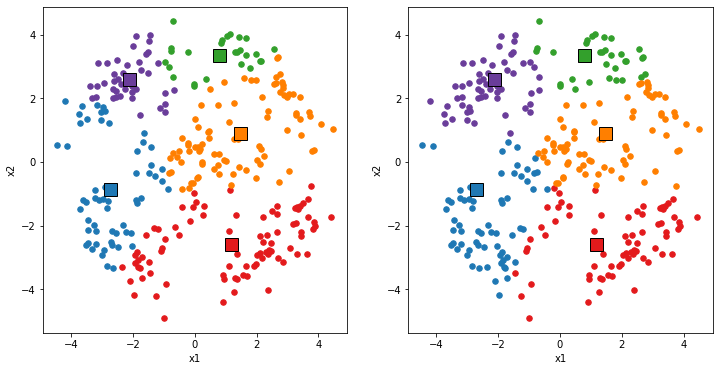

Iteration#3


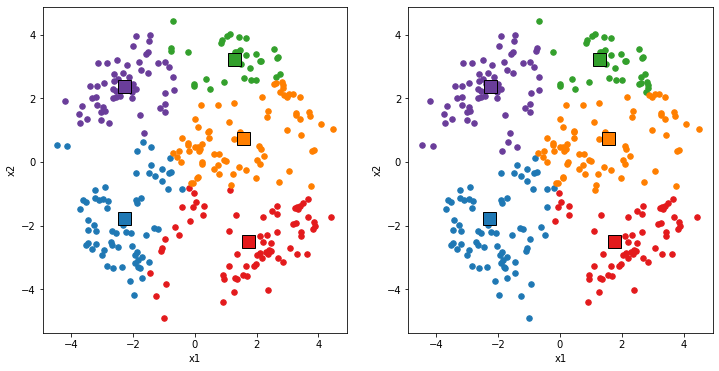

Iteration#4


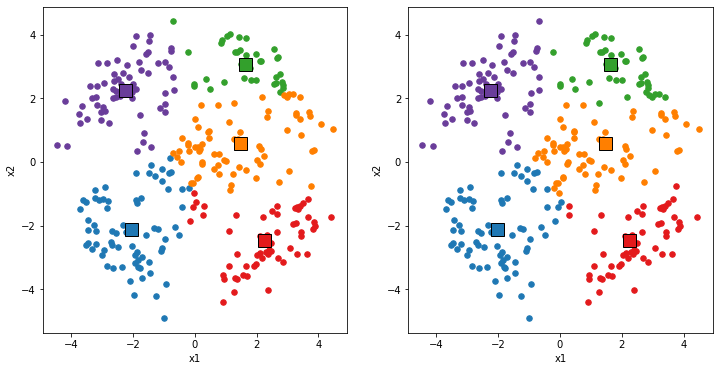

Iteration#5


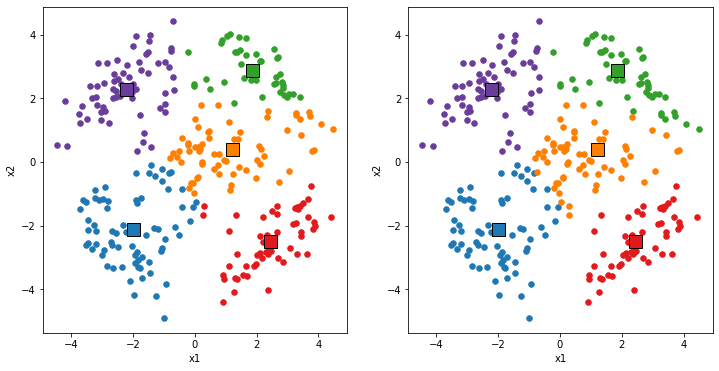

Iteration#6


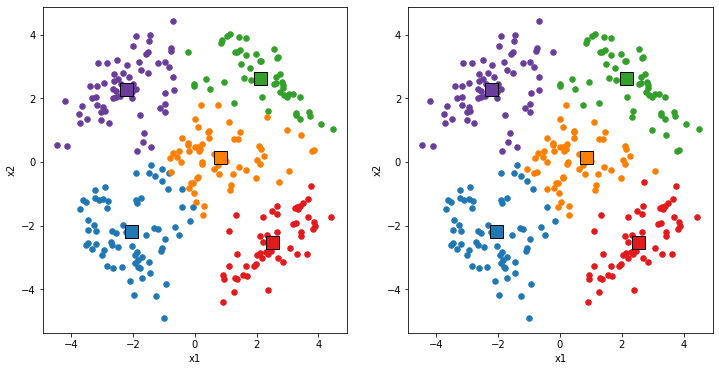

Iteration#7


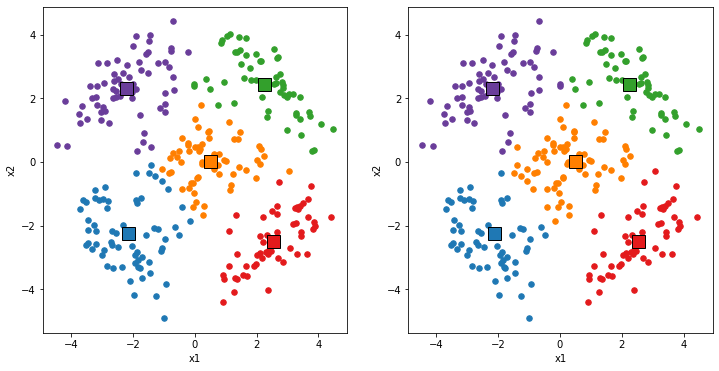

Iteration#8


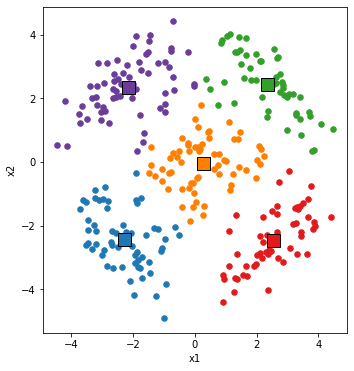

------------------------------------------------------------------------------------

The Mean Vectors after 100 iterations of EM: 


[[-2.44390007 -2.54539389]
 [ 2.5035433   2.51134852]
 [ 2.56726403 -2.55477256]
 [ 0.1279471   0.15595827]
 [-2.4146531   2.4855615 ]]

------------------------------------------------------------------------------------



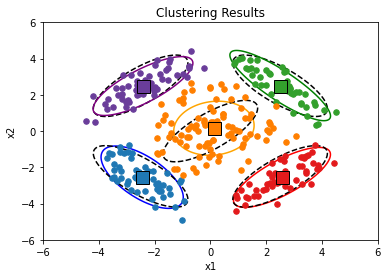


------------------------------------------------------------------------------------


In [1]:
import scipy.spatial as spa
import scipy.stats as stats
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

print()
print("------------------------------------------------------------------------------------")
print()
data_file="hw07_data_set.csv"#given data set file
df = np.genfromtxt(data_file, delimiter=",")  #reading the given data set 

#MEAN PARAMETERS
m_1= [+2.5, +2.5]#First mean parameter
m_2= [-2.5, +2.5]#Second mean parameter
m_3= [-2.5, -2.5]#Third mean parameter
m_4= [+2.5, -2.5]#Fourth mean parameter
m_5= [+0.0, +0.0]#Fifth mean parameter


#Concatenating the mean parameters
cl_m = np.array(
                        [m_1,
                         m_2,
                         m_3,
                         m_4,
                         m_5]
               )  

#COVARIANCE MATRIX PARAMETERS
cl_cov_mat_1= [
                [+0.8, -0.6], #First covariance matrix parameter
                [-0.6, +0.8]
              ]

cl_cov_mat_2= [
                [+0.8, +0.6], #Second covariance matrix parameter
                [+0.6, +0.8]
              ]

cl_cov_mat_3= [
                [+0.8, -0.6], #Third covariance matrix parameter
                [-0.6, +0.8]
              ]

cl_cov_mat_4= [
                [+0.8, +0.6], #Fourth covariance matrix parameter
                [+0.6, +0.8]
              ]

cl_cov_mat_5= [
                [+1.6, +0.0], #Fifth covariance matrix parameter
                [+0.0, +1.6]
              ]

#Concatenating the covariance matrix parameters
cl_cov_mats = np.array([cl_cov_mat_1,cl_cov_mat_2,cl_cov_mat_3,cl_cov_mat_4,cl_cov_mat_4,cl_cov_mat_5]) 
       
#CLUSTER SIZES
s_1=50 #First cluster size parameter
s_2=50 #Second cluster size parameter
s_3=50 #Third cluster size parameter
s_4=50 #Fourth cluster size parameter
s_5=100 #Fifth cluster size parameter

totalDataNumber= s_1+s_2+s_3+s_4+s_5

#Concatenating the size parameters
cl_s = np.array([s_1, s_2, s_3, s_4, s_5])  

def findSum(arr):
    s=0
    l=len(arr)
    for w in range (0,l):
        s=s+arr[w]
    return s

#From -> Lab11: Clustering
def renew_cens(mems, X):
    if mems is None:
        cens = np.genfromtxt("hw07_initial_centroids.csv", delimiter= ",") #Inializing the centroids to the given initial centroids data.
    else:
        cens = np.vstack([np.mean(X[mems == k,], axis=0) for k in range(5)])
    return cens

#From -> Lab11: Clustering
def renew_mems(cen, X):
    dst = spa.distance_matrix(cen, X)
    mem = np.argmin(dst, axis=0)
    return (mem)

#From -> Lab11: Clustering
def plot_cur_st(cent, memb, X):
    clus_col = np.array(["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a", "#b15928",
                               "#a6cee3", "#b2df8a", "#fb9a99", "#fdbf6f", "#cab2d6", "#ffff99"])
    if memb is None:
        plt.plot(X[:, 0], X[:, 1], ".", markersize=10, color="black")
    else:
        for j in range(5):
            plt.plot(X[memb == j, 0], X[memb == j, 1], ".", markersize=11,
                     color=clus_col[j])
    for g in range(5):
        plt.plot(cent[g, 0], cent[g, 1], "s", markersize=13,
                 markerfacecolor=clus_col[g], markeredgecolor="black")
    plt.xlabel("x1")
    plt.ylabel("x2")

    
centr = None
memb = None
iterCount = 1

#CLUSTER ITERATIONS, from Lab11: Clustering, k-means algorithm
while True:
    print("Iteration#"+str(iterCount)+"")
    old_cens = centr
    centr = renew_cens(memb, df)
    if np.alltrue(centr == old_cens):
        break
    else:
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plot_cur_st(centr, memb, df)

    old_mems = memb
    memb = renew_mems(centr, df)
    if np.alltrue(memb == old_mems):
        plt.show()
        break
    else:
        plt.subplot(1, 2, 2)
        plot_cur_st(centr, memb, df)
        plt.show()
    iterCount = iterCount + 1

covs = []
for v in range(5):
    covs.append(np.cov(np.transpose(df[memb == v]))) #initial covariance matrices 

prs = []
for e in range(300):
    summation = []
    prbs = []
    for z in range(5):
        x = stats.multivariate_normal(centr[z], covs[z]) \
                .pdf(df[e]) * (df[memb == z].shape[0] / 300)
        summation.append(x)
    for z in range(5):
        x = stats.multivariate_normal(centr[z], covs[z]) \
                .pdf(df[e]) * (df[memb == z].shape[0] / 300)
        div= x / np.sum(summation)
        prbs.append(div)
    prs.append(prbs)   #initial prior probabilities

my_custom_array = []
for u in range(5):
    my_custom_array.append(df[memb == u].shape[0] / 300)   #initial means

def mStep_of_the_expectation_maximization_algorithm(dSet, cnt, covar, pr):
    
    ar2 = []
    
    for s in range(5):
        a = 0
        q = 0
        for f in range(300):
            a = a + pr[f][s] * dSet[f] #finding the summation of the dataPoint*(posterior probability (hik)) along all the data points
            q = q + pr[f][s] #finding the summation of all of the posterior probabilities
        cnt[s] = a/q #mean update

    for s in range(5):
        a = 0
        q = 0
        for f in range(300):
            mat1= np.transpose((dSet[f] - cnt[s]).reshape(1,2)) #the transpose of (x-mean)
            mat2=  ((dSet[f] - cnt[s]).reshape(1,2)) #(x-mean)
            a = a + pr[f][s]*(np.matmul(mat1,mat2)) #summation of the (posterior probabilities*(x-mean)*(the transpose of (x-mean)) along all the data points 
            q = q + pr[f][s] #finding the summation of the posterior probabilities (summation of hik's)
        covar[s] = a/q #covariance matrix update
        
    for s in range(5):
        a = 0
        for f in range(300):
            a = a + pr[f][s] #finding the summation of all of the posterior probabilities
        ar2.append(a/300) #prior probability update
        
    return cnt, covar, ar2

def eStep_of_the_expectation_maximization_algorithm(dSet, cntr, covar, ar):
    
    priorProbabilities = []
    for j in range(300):
        
        tot = []
        prbs = []
        
        for u in range(5):
            b = stats.multivariate_normal(cntr[u], covar[u]) \
                    .pdf(dSet[j]) * ar[u]
            tot.append(b)
            
        for u in range(5):
            b = stats.multivariate_normal(cntr[u], covar[u]) \
                    .pdf(dSet[j]) * ar[u]
            div2= b / np.sum(tot)
            prbs.append(div2)
            
        priorProbabilities.append(prbs)
        
    return priorProbabilities


for q in range(100): #100 Iterations of the EM Algorithm
    centr, covs, my_custom_array = mStep_of_the_expectation_maximization_algorithm(df, centr, covs, prs)# mstep
    prs = eStep_of_the_expectation_maximization_algorithm(df, centr, covs, my_custom_array)# estep 

print("------------------------------------------------------------------------------------")
print()
print("The Mean Vectors after 100 iterations of EM: \n")
print()
print(centr) 
print()
print("------------------------------------------------------------------------------------")
def findMaximumIndex(arr): #A function which finds the index of the maximum element in an array
    maxInd=0
    maxElm=arr[0]
    for i in range(0,len(arr)):
        if arr[i]>maxElm:
            maxInd=i
    return maxInd

s = []
for f in range(300):
    priorWithMaxInd= np.argmax(prs[f])
    s = np.append(s, priorWithMaxInd)
    
plot_cur_st(centr, s , df)
intrvlForX1 = np.linspace(-6, 6, 241) #generating data points between -6 and 6, with the step size 0.05
intrvlForX2 = np.linspace(-6, 6, 241) #generating data points between -6 and 6, with the step size 0.05
g1, g2 = np.meshgrid(intrvlForX1, intrvlForX2)
pos = np.empty((241, 241, 2))
pos[:, :, 0] = g1;
pos[:, :, 1] = g2

colors = [ ]#array containing the colors of the clusters
colors.append('blue') #appending the color blue to the colors array
colors.append('green') #appending the color green to the colors array
colors.append('red') #appending the color red to the colors array
colors.append('orange') #appending the color orange to the colors array
colors.append('purple') #appending the color purple to the colors array

for j in range(0, 5):
    rand_var = stats.multivariate_normal(cl_m[j], cl_cov_mats[j])
    plt.contour(g1, g2, rand_var.pdf(pos), linestyles='dashed', levels=[0.05], colors='k') # plotting the dashed lines representing original Gaussian densities
    rand_var = stats.multivariate_normal(centr[j], covs[j])
    plt.contour(g1, g2, rand_var.pdf(pos), colors=colors[j], levels=[0.05])

print()
plt.title("Clustering Results")
plt.show()
print()
print("------------------------------------------------------------------------------------")